## Partial Dependence Plot

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE, RFECV, VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from sklearn.inspection import plot_partial_dependence

In [5]:
train = pd.read_csv(r'C:\WORK\Kaggle\house_price\train.csv', header = 0)
test = pd.read_csv(r'C:\WORK\Kaggle\house_price\test.csv', header = 0)

print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [6]:
nulls = train.isnull().sum().sort_values(ascending = False)
nulls = nulls[nulls > 0]

to_drop = nulls[:5].index.tolist()
train.drop(to_drop, axis = 1, inplace = True)

obj_cols = train.select_dtypes('object').columns
train.drop(obj_cols, axis = 1, inplace = True)

train.drop(['Id'], axis =1, inplace = True)

train.fillna(train.mean(), inplace = True)

In [7]:
X = train.drop(['SalePrice'], axis = 1)
y = train['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0)

model = RandomForestRegressor(n_estimators = 200, max_depth = 10, random_state = 0)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=0)

In [23]:
model2 = LGBMRegressor(n_estimators = 1000, max_depth = 10, num_leaves = 30, random_state = 0)
model2.fit(X_train, y_train)

LGBMRegressor(max_depth=10, n_estimators=1000, num_leaves=30, random_state=0)

### PDP interpretation

#### (1) Individual variable interpretation with target 

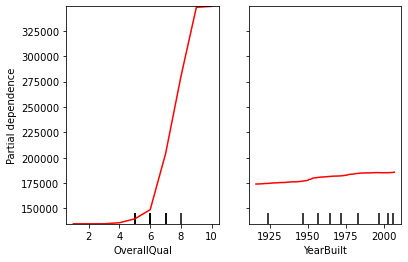

In [20]:
features = [3, 5] # feature columns index
plot_partial_dependence(model, X_train, features, line_kw={"color": "red"})

#### (2) Interaction between two variables

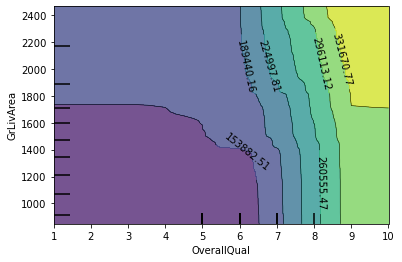

In [21]:
features = [('OverallQual', 'GrLivArea')] # feature columns index
plot_partial_dependence(model, X_train, features, line_kw={"color": "red"})

#### (3) Comparison of models

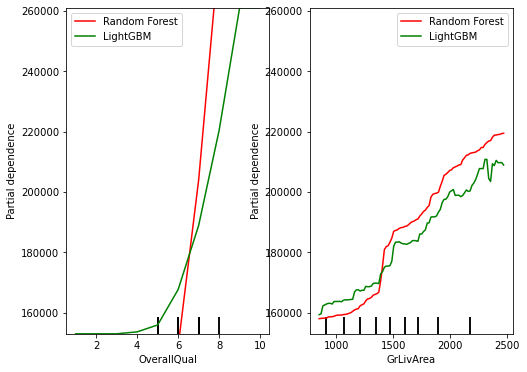

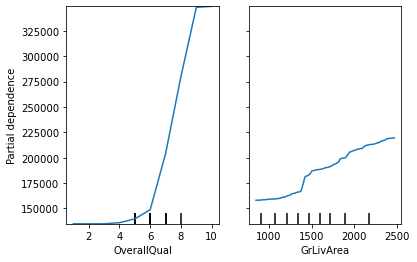

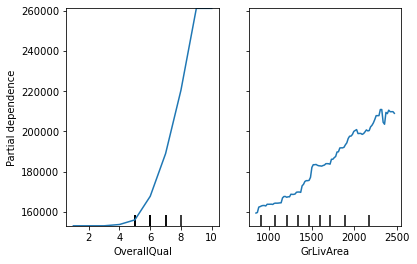

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))

# set axes plot 
rf_disp = plot_partial_dependence(model, X_train, ['OverallQual', 'GrLivArea'])
lgbm_disp = plot_partial_dependence(model2, X_train, ['OverallQual', 'GrLivArea'])

rf_disp.plot(ax=[ax1, ax2], line_kw={"label": "Random Forest", "color": "red"})
lgbm_disp.plot(ax=[ax1, ax2], line_kw={"label": "LightGBM", "color": "green"})
ax1.legend()
ax2.legend()

plt.show()